<a href="https://colab.research.google.com/github/Jaypardeshii/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Predictione**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [173]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter
from prettytable import PrettyTable


%matplotlib inline



### Dataset Loading

In [ ]:
# Load Dataset

url = "https://drive.google.com/file/d/1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].sum()

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

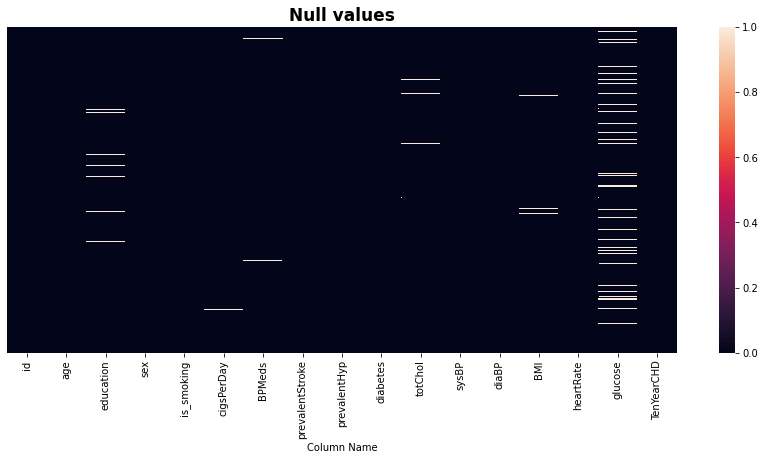

In [ ]:
# Visualizing the missing values
plt.figure(figsize= (15,6))
sns.heatmap(df.isnull(), cbar = True, yticklabels=False)
plt.xlabel('Column Name')
plt.title('Null values', fontweight = 'bold', size =17)
plt.show()

We have given dataset of person's information about their past/present medical condition like wether they have BP or not, previous stroke history, somke or not, if they somke then how many cig per day? theri heart rate, BMI, glucose and by using this dataset we have to predict their cardiovascular risk.

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Check Unique Values for each variable.
df.id.unique()

array([   0,    1,    2, ..., 3387, 3388, 3389])

In [ ]:
df.age.unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32])

In [ ]:
df.education.unique()

array([ 2.,  4.,  1.,  3., nan])

In [ ]:
df.cigsPerDay	.unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

In [ ]:
df.BPMeds.unique()

array([ 0., nan,  1.])

In [ ]:
df.prevalentStroke.unique()

array([0, 1])

In [ ]:
df.prevalentHyp.unique()

array([0, 1])

In [ ]:
df.diabetes.unique() 

array([0, 1])

In [ ]:
df.totChol.unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

In [ ]:
df.sysBP.unique()

array([148. , 168. , 116. , 158. , 136.5, 182. , 232. , 102. , 126. ,
       144. , 185. , 138. ,  96. , 146.5, 160. , 146. , 163. , 129. ,
       122.5, 130. , 141. , 142. , 113. , 172.5, 107. , 105. , 122. ,
       155. , 134. , 152. , 142.5, 149. , 106.5, 186.5, 114. , 104. ,
       101. , 112. , 165. , 131. , 111. , 133. , 109. , 121.5, 120. ,
       178. , 150. , 152.5, 193. , 151. , 118.5, 125. , 110. , 136. ,
       113.5, 127. , 115. , 108. , 103. , 124. , 135. , 118. , 132. ,
       128. , 100. , 115.5, 127.5, 123. , 174.5, 129.5, 117. , 117.5,
       147. , 177.5, 109.5, 157.5, 106. , 112.5, 107.5, 137. , 124.5,
       192. , 207. , 119. , 179.5, 157. , 176. ,  90. , 140. , 159. ,
       150.5, 202. , 116.5, 108.5, 158.5, 169. , 121. ,  95. , 120.5,
       156. , 145. , 141.5, 143.5, 119.5, 131.5, 125.5, 180. , 105.5,
       126.5, 153. , 154. , 182.5, 166.5, 175. , 170. , 143. ,  99. ,
       244. , 161.5, 100.5, 132.5, 139. , 186. ,  94. , 172. , 149.5,
       137.5, 191. ,

In [ ]:
df.diaBP.unique()

array([ 85. ,  98. ,  71. ,  88. , 121. , 136. ,  68. ,  78. ,  81. ,
        86.5,  62. ,  97. , 120. ,  89. , 105. ,  93. ,  91. ,  92. ,
        86. ,  73. ,  70. ,  74.5,  84. ,  80. ,  82. ,  70.5,  74. ,
        63. ,  65. ,  76. ,  64. , 106. ,  75.5,  79.5,  89.5,  83. ,
        94. ,  97.5,  75. ,  57. ,  90. ,  87. , 103. ,  96. , 104. ,
        82.5,  80.5,  66.5, 100. ,  72. ,  99. ,  67.5,  77.5,  85.5,
        95. ,  79. ,  77. ,  69. ,  72.5,  73.5, 101.5,  62.5,  96.5,
        68.5, 102. , 122.5, 114. ,  60. ,  84.5, 124. , 100.5,  59. ,
        88.5, 108. ,  66. ,  67. ,  95.5, 107. ,  78.5, 101. ,  92.5,
        81.5,  91.5,  98.5,  93.5, 109.5,  61. ,  76.5, 115.5,  87.5,
        83.5, 109. ,  64.5, 104.5,  94.5, 110. ,  55. , 102.5,  59.5,
       107.5, 130. ,  61.5, 129. ,  65.5,  60.5,  58. ,  48. , 106.5,
       116. , 118. , 111. , 115. , 113. , 117. , 103.5,  71.5,  50. ,
       105.5, 112. , 135. ,  54. , 112.5, 125. ,  52. , 133. , 123. ,
       128. , 117.5,

In [ ]:
df.BMI.unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

In [ ]:
df.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [ ]:
df.glucose.unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

In [ ]:
df.TenYearCHD.unique()

array([1, 0])

## ***Data Cleaning***

In [ ]:
# Creating df copy
df_copy = df.copy(deep=True)

In [ ]:
num_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
# Handling outliers by standard methods and Plotting graphs:

pk1 = df_copy.copy()
for col in num_features:


  # Using IQR method to define the range of inliners:

  q1, q3, median = pk1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  pk1[col] = np.where(pk1[col] > upper_limit, median,np.where(
                         pk1[col] < lower_limit,median,pk1[col]))


In [ ]:
# handling null values 

# replacing categorical value with mode..
df_copy['BPMeds'].fillna(df_copy['BPMeds'].mode()[0], inplace=True) 
df_copy['education'].fillna(df_copy['education'].mode()[0], inplace=True) 

# replacing numerical value with median..
df_copy['cigsPerDay'].fillna(df_copy['cigsPerDay'].median(), inplace=True)
df_copy['totChol'].fillna(df_copy['totChol'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)
df_copy['heartRate'].fillna(df_copy['heartRate'].median(), inplace=True)
df_copy['glucose'].fillna(df_copy['glucose'].median(), inplace=True)

In [ ]:
# recheking for null values
df_copy.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# converting object datatype into int.
df_copy['sex'] = df_copy['sex'].apply(lambda x : 1 if x == "M" else 0)
df_copy['is_smoking'] = df_copy['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [ ]:
# checking the distribution
df_copy['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [ ]:
# checking the distribution
df_copy['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

  **Converted objective datatype into int.** :-
* In sex feature M will be converted to 1 and F will be converted to 0.
* In is_smoking feature YES will be converted to 1 and NO will be converted to 0.

In [ ]:
# Defining 3 lists of dependent, continuous, categorical variable 
dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

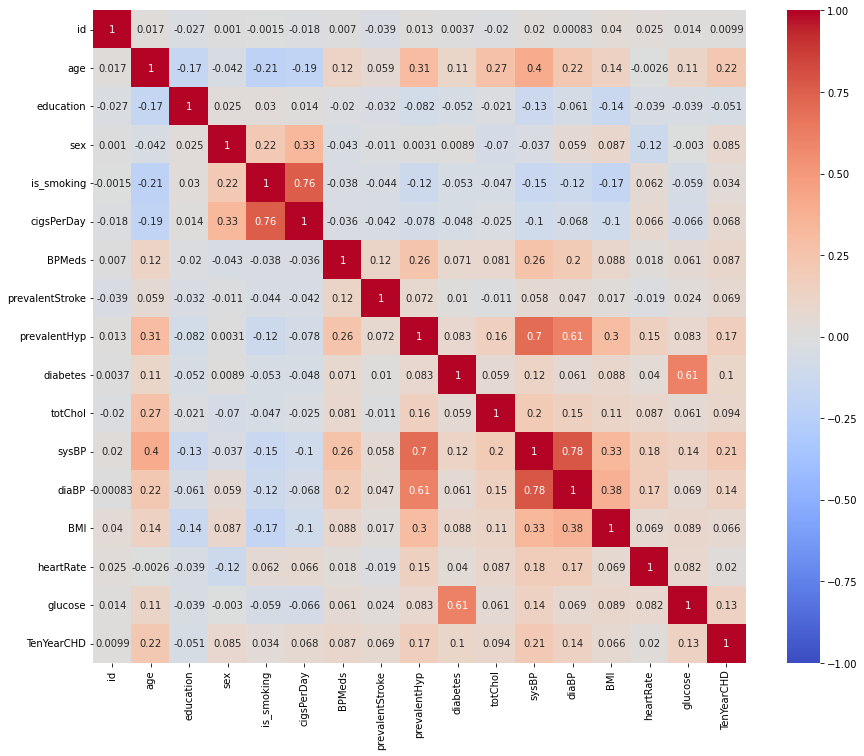

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_copy.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

Through this correlation map we can see that 
* sysBP and diaBP are positively corelated with prevalentStroke. 
* sysBP and diaBP are also positively corelated with each other.
* glucose and diabetes also positivly corelated. 
* and intrestingly we can see that education is negatively correlated with TenYearCHD, diaBP, diabetes and prevelentHyp. 


In [ ]:
# checking the distribution of Target Variable
df_copy.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6cf55df8e0>,
 [Text(-0.9789475551056555, 0.5016589322962961, 'No-TenYearCHD'),
  Text(0.9789475551056555, -0.5016589322962962, 'TenYearCHD')],
 [Text(-0.5339713936939938, 0.27363214488888876, '84.93%'),
  Text(0.5339713936939938, -0.2736321448888888, '15.07%')])

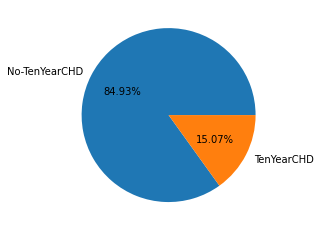

In [ ]:
#Plotting pie chart of target variable
plt.pie(df_copy['TenYearCHD'].value_counts(),labels=['No-TenYearCHD','TenYearCHD'],autopct='%0.2f%%')


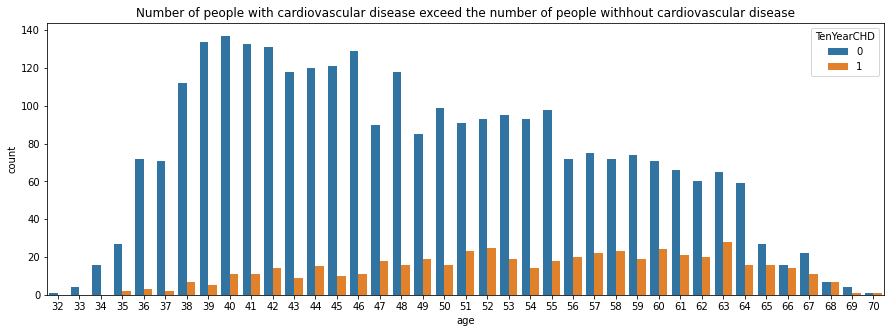

In [ ]:
# Visualising the target and age variable
plt.figure(figsize=[15,5])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df_copy)

Through this chart we can clearly see age wise distribution of having high chance of cardiovascular deases.

**Observation :**

As age increases risk of having cardiovascular deases also increases.


In [ ]:
# creating function for chart
def chart(data):
  sns.barplot(x = data, y = 'TenYearCHD', data = df_copy)
  plt.title('CHD risk for'+' '+data)
  return data

'is_smoking'

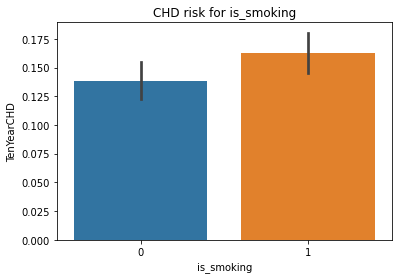

In [ ]:
# CHD risk prediction Smoker Vs Non smoker
chart('is_smoking')


* Through this plot we can say that Smokers have higher chance of having CHD over non smokers.

'BPMeds'

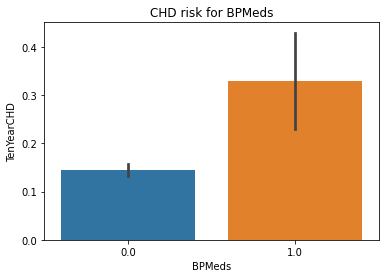

In [ ]:
# CHD risk prediction having BPMeds Vs Non BPMeds
chart('BPMeds')

* People who are taking BP medicines having high chance of CHD over who is not BP patient 

'prevalentStroke'

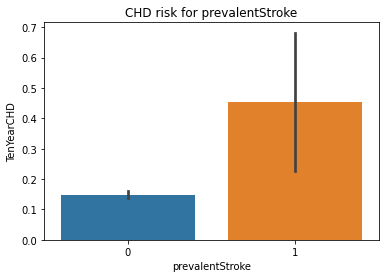

In [ ]:
# CHD risk prediction prevalentStroke vs non-prevalentStroke
chart('prevalentStroke')

* Very high chance of CHD for people who have history of  stroke.

'prevalentHyp'

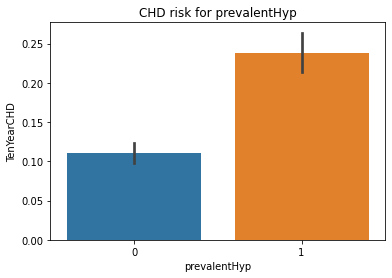

In [ ]:
# CHD risk prediction for prevalentHyp vs non-prevalentHyp
chart('prevalentHyp')

* Chances of having CHD is higher who have history of hypertention compare to who don't.

'diabetes'

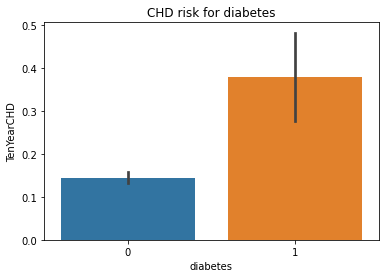

In [ ]:
# CHD risk prediction for diabetes vs non-diabetes
chart('diabetes')

'education'

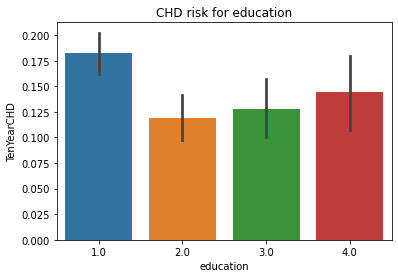

In [ ]:
chart('education')

* From all the above chart we can say that if person have any medical history of dibetes, hypertention, heart strok, or BP having high chance of CHD over who donn't.

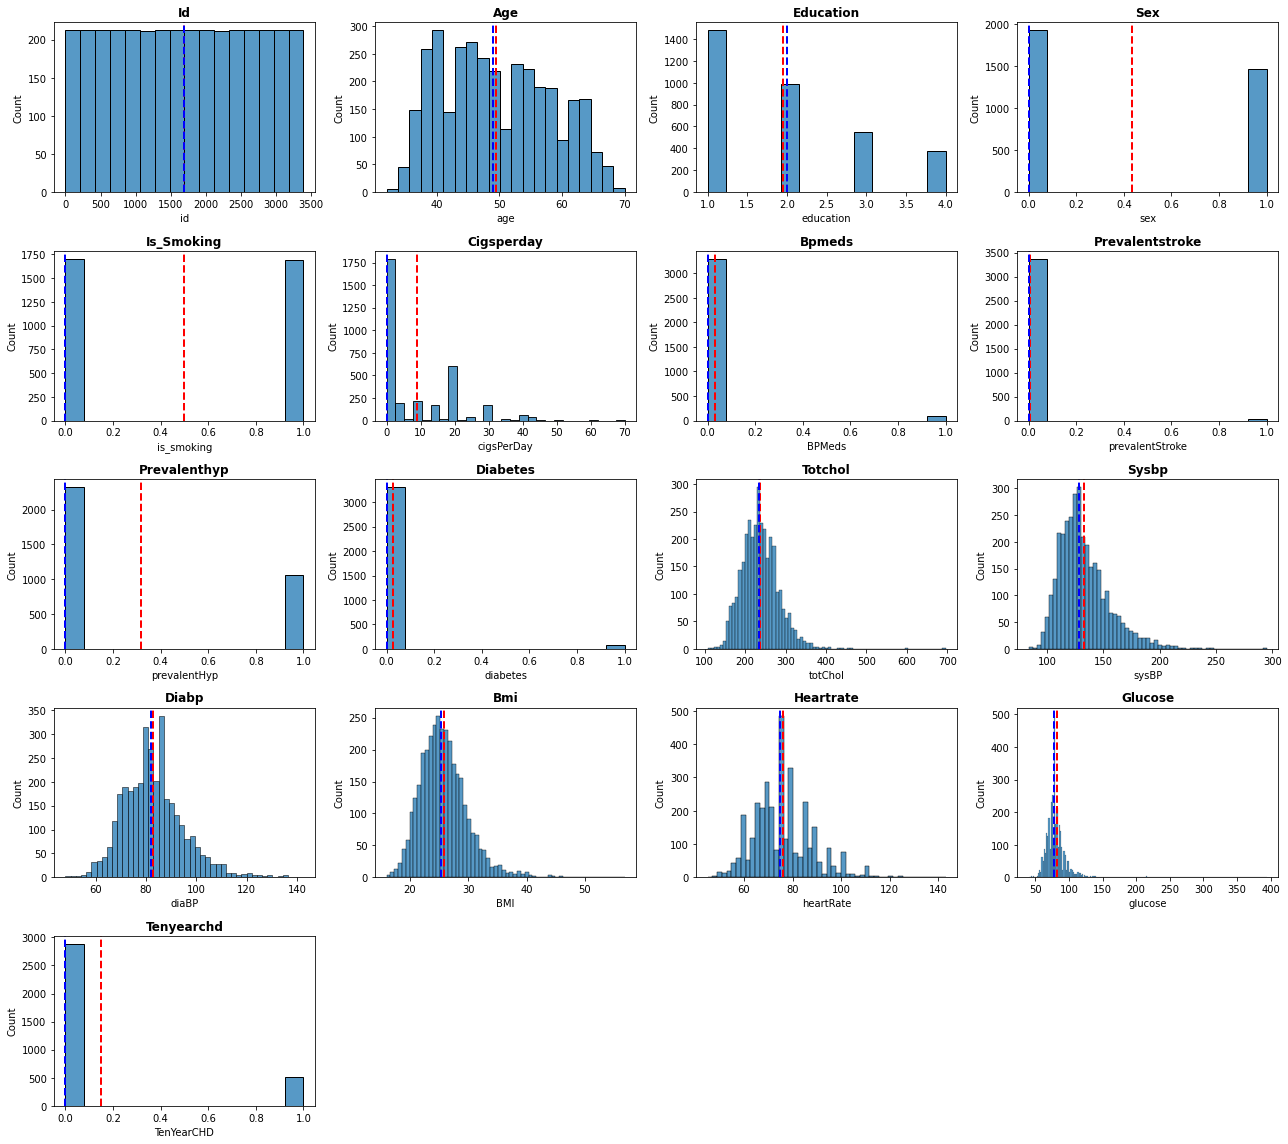

In [ ]:
# subplots for all the features to represent their mean, median and distributions

plt.figure(figsize=(18,16))

for i, column in enumerate(df_copy.columns):
  feature = df_copy[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

<Figure size 720x360 with 0 Axes>

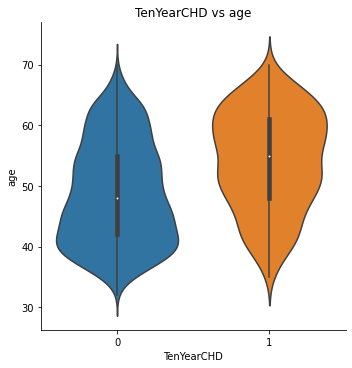

<Figure size 720x360 with 0 Axes>

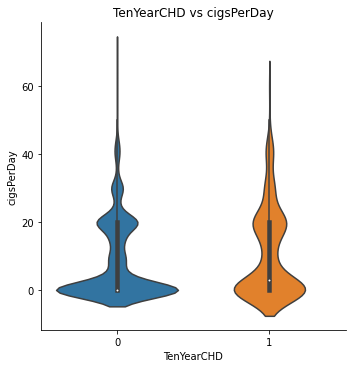

<Figure size 720x360 with 0 Axes>

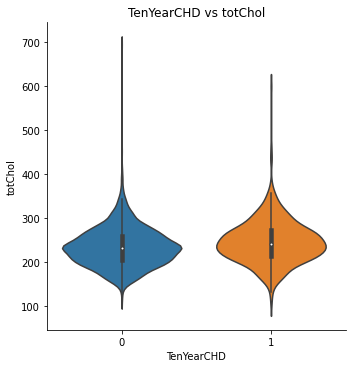

<Figure size 720x360 with 0 Axes>

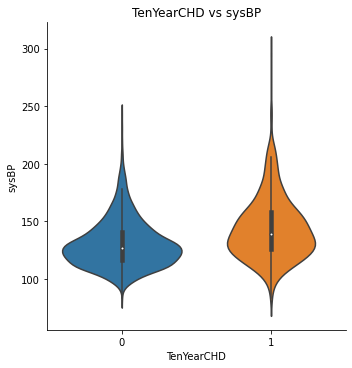

<Figure size 720x360 with 0 Axes>

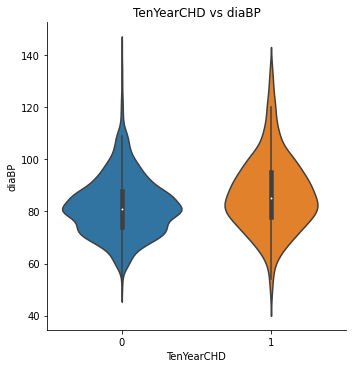

<Figure size 720x360 with 0 Axes>

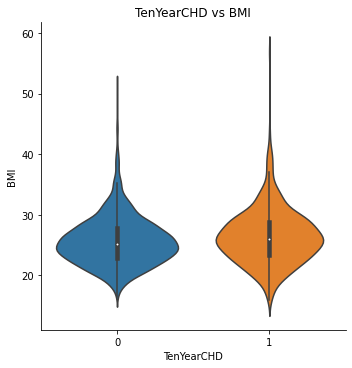

<Figure size 720x360 with 0 Axes>

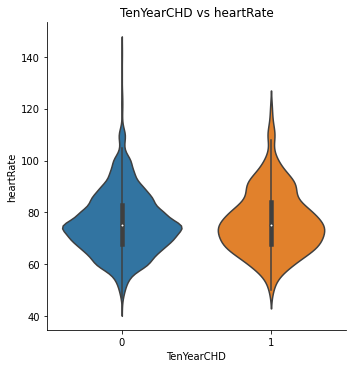

<Figure size 720x360 with 0 Axes>

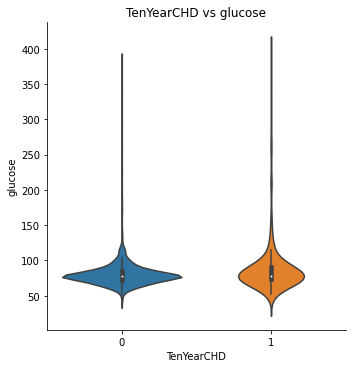

In [ ]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df_copy,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

## Handling Multicollinearity

In [ ]:
# Range of systolic bp and diastolic bp

print(df_copy['sysBP'].min(),df_copy['sysBP'].max())
print(df_copy['diaBP'].min(),df_copy['diaBP'].max())

83.5 295.0
48.0 142.5


To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

Pulse Pressure = Systolic BP - Diastolic BP

In [ ]:
# Creating a new column pulse_pressure
# and dropping sysBP and diaBP

df_copy['pulse_pressure'] = df_copy['sysBP']-df_copy['diaBP']
df_copy.drop('sysBP',axis=1,inplace=True)
df_copy.drop('diaBP',axis=1,inplace=True)

In [ ]:
df_copy.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('sysBP')
continuous_var.remove('diaBP')
continuous_var.append('pulse_pressure')

Text(0.5, 1.0, 'Pulse Pressure Distribution')

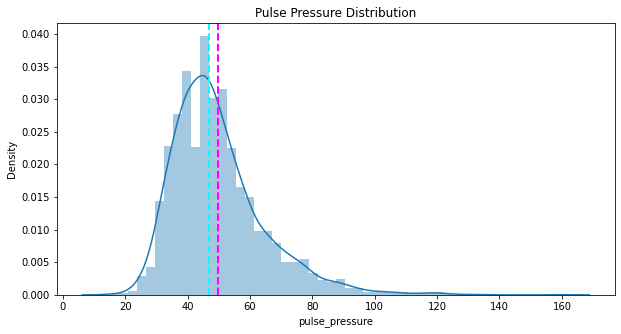

In [ ]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df_copy['pulse_pressure'])
plt.axvline(df_copy['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_copy['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

<Figure size 720x360 with 0 Axes>

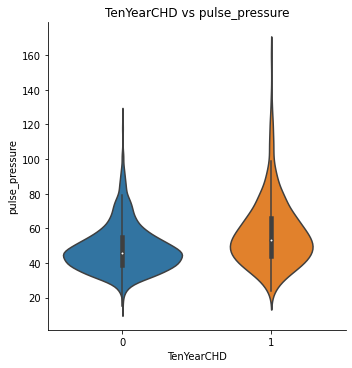

In [ ]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df_copy,kind='violin')
plt.title('TenYearCHD vs pulse_pressure')
plt.show()
     

On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.

### ***Hypothesis Testing***

To check whether discrete variables are related, chi2 test can be used. We define:

Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [ ]:
# chi2 scores
chi_scores = chi2(df_copy[categorical_var],df_copy[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df_copy[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         1.588409e-01
education          2.909740e-02
sex                2.056887e-04
prevalentStroke    6.813318e-05
BPMeds             5.436407e-07
diabetes           2.542262e-09
prevalentHyp       1.027137e-15
dtype: float64

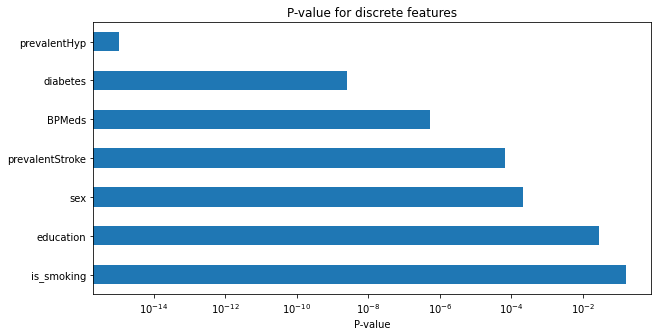

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

From above chart we can say that prevalentHyp is most imp feature and on the other hand is_smoking is least imp. feature.

In [ ]:
# dropping is_smoking
df_copy.drop('is_smoking',axis=1,inplace=True)

In [ ]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['education', 'sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

## Log Transformation

In [ ]:
# Implementing log transformation on continuous variables

df_copy['age']                   = np.log10(df_copy['age']+1)
df_copy['cigsPerDay']          = np.log10(df_copy['cigsPerDay']+1)
df_copy['totChol']     = np.log10(df_copy['totChol']+1)
df_copy['BMI']                   = np.log10(df_copy['BMI']+1)
df_copy['heartRate']            = np.log10(df_copy['heartRate']+1)
df_copy['glucose']               = np.log10(df_copy['glucose']+1)
df_copy['pulse_pressure']        = np.log10(df_copy['pulse_pressure']+1)

In [ ]:

# Checking skew after log transformation
df_copy[continuous_var].skew(axis = 0)


age              -0.015053
cigsPerDay        0.301771
totChol           0.011860
BMI               0.370422
heartRate         0.165898
glucose           2.411348
pulse_pressure    0.354174
dtype: float64

## ***Data Pre-processing***

In [ ]:
# Defining dependent and independent variables
X = df_copy.drop('TenYearCHD',axis=1)
y = df_copy[dependent_var]

In [ ]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

TenYearCHD
0             2015
1              358
dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [ ]:
# Checking the test distribution of dependent variable
y_test.value_counts()
     

TenYearCHD
0             864
1             153
dtype: int64

In [ ]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

###Oversampling:
Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


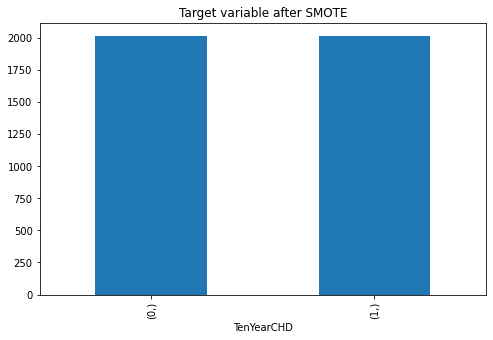

In [ ]:
# visualize the target variable after SMOTE
plt.figure(figsize = (8,5))
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

###Standard Scaling

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure
0,0.421853,1.352753,1.042877,1.126340,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.265877,-0.544536,-0.273259,-0.455092,0.008708
1,-1.533156,0.238381,-0.929033,1.126340,1.438531,-0.178155,-0.087426,-0.685091,-0.171759,0.155470,0.790639,-0.457348,-0.879101,-0.066953
2,-1.404176,0.872536,-0.929033,1.126340,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.686137,0.637178,-0.183098,1.104683,-0.386237
3,-1.045673,1.444209,-0.929033,-0.887831,-0.911595,-0.178155,-0.087426,1.459660,-0.171759,2.342925,0.432564,0.812784,1.251458,1.211142
4,0.239047,0.457551,-0.929033,-0.887831,1.171992,-0.178155,-0.087426,-0.685091,-0.171759,0.199905,-1.703481,-0.457348,-0.387783,0.008708


In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure
0,0.416472,1.234200,1.194520,1.289117,1.194050,-0.231743,-0.068826,-0.647699,-0.145013,0.185728,-0.642626,-0.323661,-0.512217,-0.181162
1,-1.539475,0.031098,-0.931026,1.289117,1.478030,-0.231743,-0.068826,-0.647699,-0.145013,0.068651,0.774470,-0.521705,-0.898278,-0.257925
2,-1.410433,0.715746,-0.931026,1.289117,1.194050,-0.231743,-0.068826,-0.647699,-0.145013,0.631379,0.611594,-0.226665,0.907962,-0.581859
3,-1.051758,1.332938,-0.931026,-0.775725,-1.025872,-0.231743,-0.068826,1.543927,-0.145013,2.388265,0.394426,0.844712,1.041601,1.038783
4,0.233578,0.267719,-0.931026,-0.775725,1.194050,-0.231743,-0.068826,-0.647699,-0.145013,0.115770,-1.872680,-0.521705,-0.450931,-0.181162


In [ ]:
# scaled test values
X_test_scaled.head()

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure
0,-0.848543,-1.772587,0.131747,1.289117,1.194050,-0.231743,-0.068826,1.543927,-0.145013,0.368189,0.767256,0.417692,-1.175070,-0.755048
1,-0.500029,-0.737584,2.257293,1.289117,0.280595,-0.231743,-0.068826,1.543927,-0.145013,-0.247501,0.886559,-1.841604,0.173923,0.870804
2,-0.582331,-1.459036,0.131747,-0.775725,-1.025872,-0.231743,-0.068826,-0.647699,-0.145013,-1.408308,-1.375820,-0.521705,-0.156269,-0.376122
3,-0.292749,-0.341470,-0.931026,-0.775725,-1.025872,-0.231743,-0.068826,-0.647699,-0.145013,0.923825,0.439900,-0.323661,-0.271862,0.315961
4,1.308587,-0.875385,0.131747,-0.775725,1.478030,-0.231743,-0.068826,-0.647699,-0.145013,0.185728,-0.333124,-1.151152,-0.099552,-0.457057


## ***ML Model Implementation***

##Logistic Regression

In [ ]:
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.711166253101737

In [ ]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.5947712418300654

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       864
           1       0.25      0.59      0.35       153

    accuracy                           0.67      1017
   macro avg       0.58      0.64      0.56      1017
weighted avg       0.81      0.67      0.71      1017



###Confusion Matrices

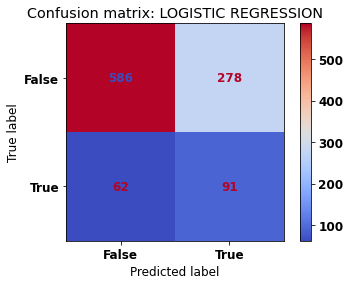

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

##K Nearest Neighbors:

In [ ]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

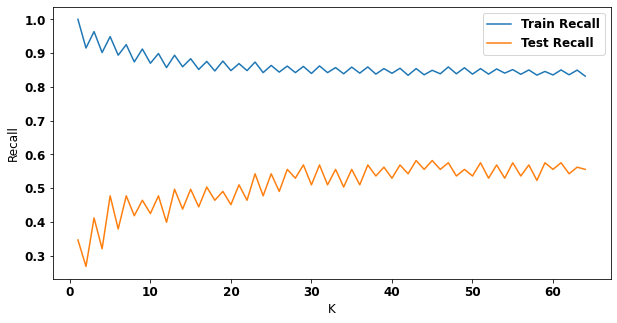

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()
     

In [ ]:
# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

43

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=43)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [ ]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8540942928039702

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.5816993464052288

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71       864
           1       0.20      0.58      0.30       153

    accuracy                           0.59      1017
   macro avg       0.54      0.59      0.50      1017
weighted avg       0.79      0.59      0.65      1017



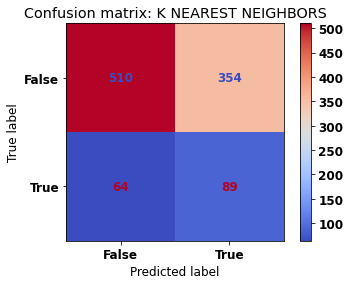

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 44

##Naive Bayes:

In [ ]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }


nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params
     

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.7344913151364765

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.6209150326797386

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       864
           1       0.24      0.62      0.34       153

    accuracy                           0.64      1017
   macro avg       0.57      0.63      0.55      1017
weighted avg       0.80      0.64      0.69      1017



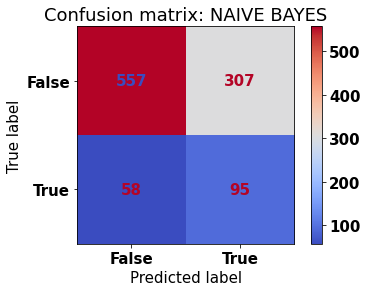

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

False negatives obtained after using Naive Bayes: 72



##Decision Tree:

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [ ]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [ ]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall
     

0.8620347394540943

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [ ]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



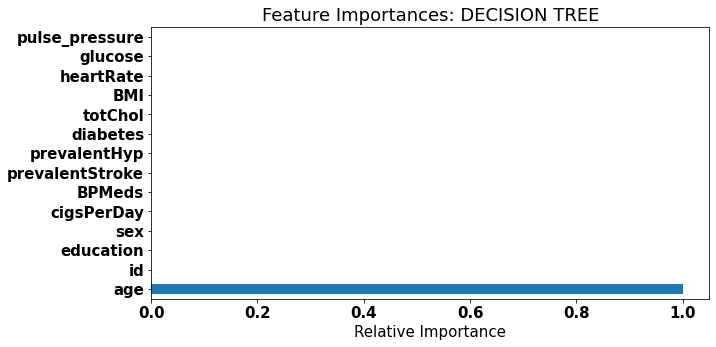

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

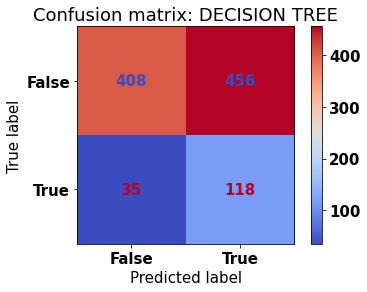

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

##Support Vector Machines:

In [ ]:
# SVM model parameters
from sklearn.svm import SVC
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_
     

In [ ]:
# model best parameters
svm_best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:

# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=1, gamma=0.01)

In [ ]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [ ]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7846153846153846

In [ ]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5620915032679739

In [ ]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       864
           1       0.22      0.56      0.32       153

    accuracy                           0.64      1017
   macro avg       0.56      0.61      0.54      1017
weighted avg       0.79      0.64      0.69      1017



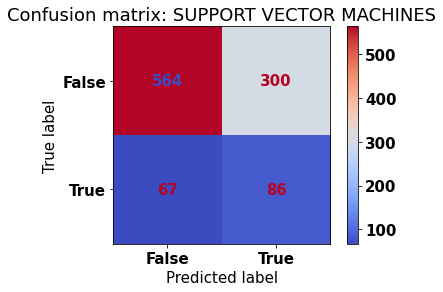

In [ ]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

##Random forest:

In [ ]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}
     

# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params


{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)
     

In [ ]:
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [ ]:

# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [ ]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.7870967741935484

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)
     

In [ ]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6601307189542484

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       864
           1       0.24      0.66      0.35       153

    accuracy                           0.64      1017
   macro avg       0.58      0.65      0.55      1017
weighted avg       0.81      0.64      0.69      1017



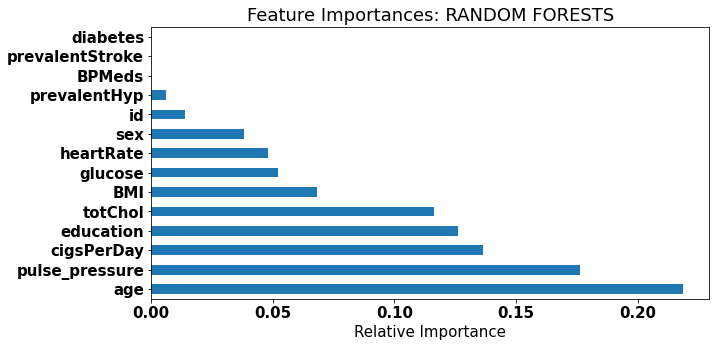

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* Features other than age are also given importance in this case insted of just one feature in case of decision tree.
* But age still remains the most important feature in predicting the final outcome for random forests.


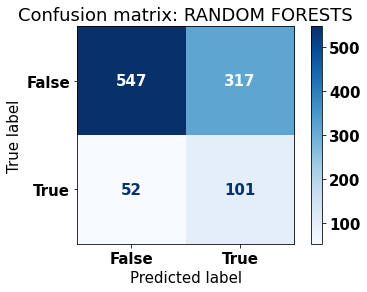

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='Blues')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

##XG Boost:

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}


In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.7831265508684864

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.30718954248366015

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       864
           1       0.32      0.31      0.31       153

    accuracy                           0.80      1017
   macro avg       0.60      0.59      0.60      1017
weighted avg       0.79      0.80      0.79      1017



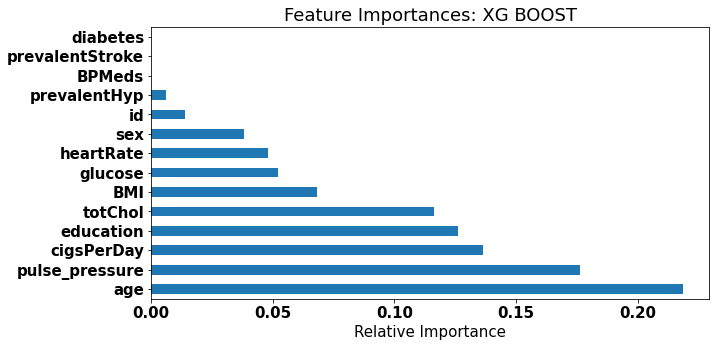

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* Age in the most important feature in deciding the outcome of the variables for XG boost.
* Multiple features are given importance here rather than just one feature in case of decision tree.

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88       864
    Positive       0.32      0.31      0.31       153

    accuracy                           0.80      1017
   macro avg       0.60      0.59      0.60      1017
weighted avg       0.79      0.80      0.79      1017



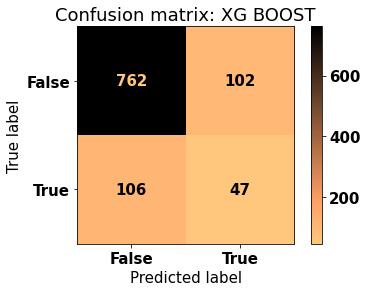

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='copper_r')
plt.title('Confusion matrix: XG BOOST')
plt.show()

## **Results**

In [174]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+--------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)   |
+---------+-------------------------+-------------------+--------------------+
|    1    |   Logistic Regression   |  71.1166253101737 | 59.47712418300654  |
|    2    |   K Nearest Neighbors   | 85.40942928039702 | 58.16993464052288  |
|    3    |       Naive Bayes       | 73.44913151364764 | 62.091503267973856 |
|    4    |      Decision Tree      | 86.20347394540943 | 77.12418300653596  |
|    5    | Support Vector Machines | 78.46153846153847 | 56.209150326797385 |
|    6    |      Random Forests     | 78.70967741935485 | 66.01307189542483  |
|    7    |         XG Boost        | 78.31265508684864 | 30.718954248366014 |
+---------+-------------------------+-------------------+--------------------+


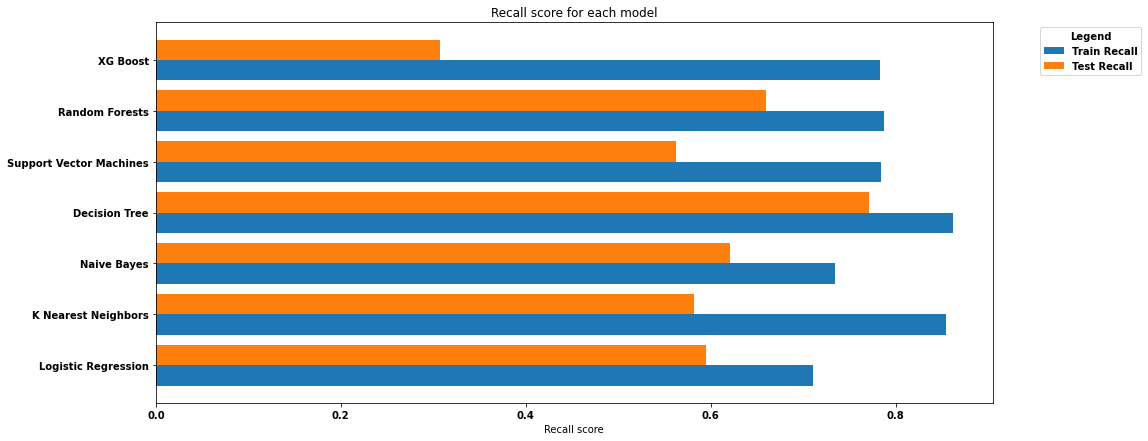

In [175]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(15,7))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()
     

* The decision tree has the highest train and test recall score compared to other models built.


# **Conclusion**

* We trained 7 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
* Recall was chosen as the model evaluation metric.
* The decision tree has the highest train and test recall score compared to other models built.
* Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.
* From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.
* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD